In [50]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
from datetime import datetime
import time
consumer_key = "evX5kJll0C8sMhUkt812CnSpx"
consumer_secret = "ou6c7uxhbGlsQ6yfhIMmkT3WcVxNlEza9KJ6f8bZLdf0YrtELD"
access_token = "942094709844881419-AI8Zy6T7ueCrtJi6xk17JZ4S6XrPv7A"
access_token_secret = "ZVterA2YsDb3DCchSVcS9HmqTZM3N7eiaQN0UekpxzgkR"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
popular_tweeters = pd.read_csv("C:\\Users\Gevork\Desktop\Group-Project-1\LA-restaurant.csv")

In [31]:
target_user = '@' + popular_tweeters["User Name"]

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(10):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Print the Averages
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))



User: @redlobster
Compound: 0.30365
Positive: 0.30365
Neutral: 0.668
Negative: 0.0283

User: @SUBWAY
Compound: 0.23565
Positive: 0.23565
Neutral: 0.7316
Negative: 0.03275

User: @EATALIANCAFE
Compound: 0.24395
Positive: 0.24395
Neutral: 0.75605
Negative: 0.0

User: @innoutburger
Compound: 0.0
Positive: 0.0
Neutral: 1.0
Negative: 0.0

User: @HUSTLERCASINOLA
Compound: 0.17865
Positive: 0.17865
Neutral: 0.81245
Negative: 0.00885

User: @roscoesofficial
Compound: 0.10005
Positive: 0.10005
Neutral: 0.87925
Negative: 0.0207

User: @littlecaesars
Compound: 0.26815
Positive: 0.26815
Neutral: 0.7206
Negative: 0.0113

User: @BicycleCasino
Compound: 0.02275
Positive: 0.02275
Neutral: 0.97725
Negative: 0.0

User: @Chilis
Compound: 0.33125
Positive: 0.33125
Neutral: 0.6319
Negative: 0.0369

User: @Fatburger
Compound: 0.07465
Positive: 0.07465
Neutral: 0.92125
Negative: 0.0041

User: @wingstop
Compound: 0.21965
Positive: 0.21965
Neutral: 0.7771
Negative: 0.00325

User: @ChuckECheeses
Compound: 0.25

In [65]:
target_user = popular_tweeters["User Name"]

# Create array to record all date-times of tweets
tweet_times = []

# Loop through 500 tweets
for x in range(25):
    
    # Get all tweets from target user
    public_tweets = api.home_timeline(
        count= 20, page= 3)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
        
        # Print tweets for preview
        print(tweet["created_at"])


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [66]:
overall_sentiments = compound_list

In [76]:
x_axis = np.arange(len(overall_sentiments))

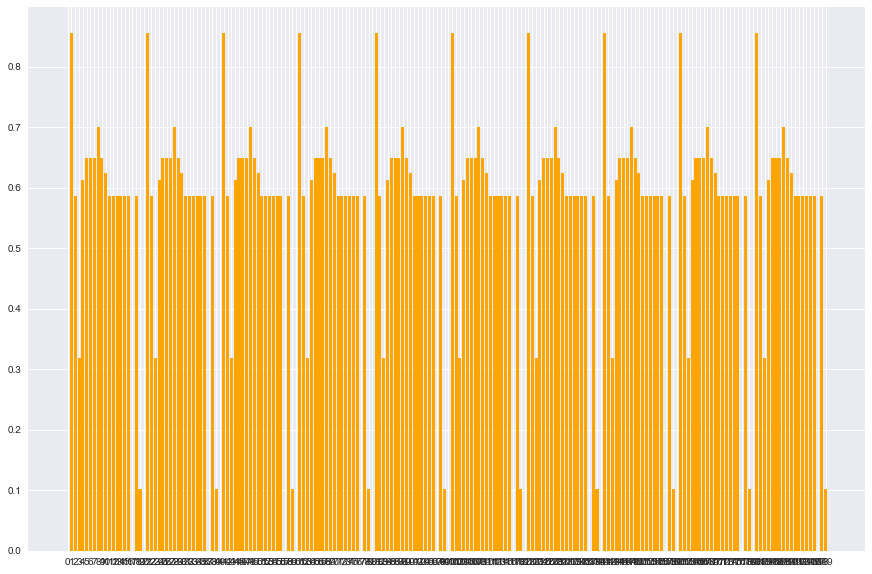

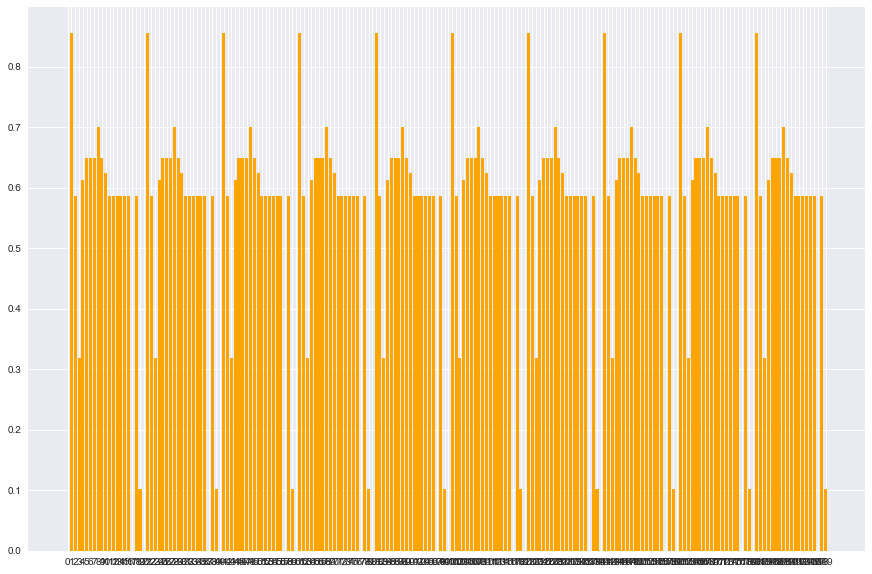

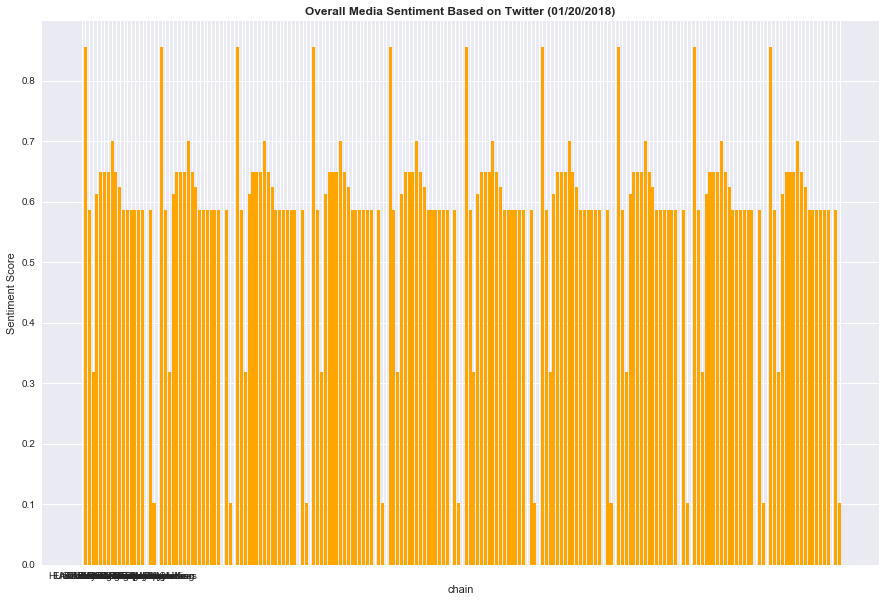

In [80]:
import seaborn as sns
sns.set()

plt.figure(figsize=(15,10))

mean_sentiment_analysis = plt.bar(x_axis,
                                  overall_sentiments,
                                  color = { "orange"})

tick_locations = [value for value in x_axis]
tick_labels = target_user
plt.xticks(tick_locations, tick_labels)
plt.xlabel("chain")
plt.ylabel("Sentiment Score")
plt.title("Overall Media Sentiment Based on Twitter (%s)" %(time.strftime("%m/%d/%Y")), fontweight='bold')

plt.savefig('Overall Media Sentiment Based on Twitter.png')
    
plt.show()
